In [148]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import seaborn as sns
import pandas as pd
import numpy as np

In [163]:
#Importing main table
main_df = pd.read_csv('data/Master_Table.csv', index_col="Title_ID", usecols = ["Title_ID", "Lifetime_Gross", "Genres", "Year"])


In [164]:
#Splitting genres into separate columns
split_genre_df = main_df["Genres"].str.split(",", n=2, expand = True).add_prefix("Genre_")
split_genre_df.head()

,Genre_0,Genre_1,Genre_2
Title_ID,,,
tt0369610,Action,Adventure,Sci-Fi
tt0401729,Action,Adventure,Sci-Fi
tt1179034,Action,Crime,Thriller
tt1194173,Action,Adventure,Thriller
tt1219289,Mystery,Sci-Fi,Thriller


In [189]:
#Merging genres back into the main table
merged_genre_df = main_df.join(split_genre_df)
merged_genre_df = merged_genre_df.reset_index()

In [190]:
#Creating dataframes for each set of genre columns
gen0_df = merged_genre_df[["Year", "Lifetime_Gross", "Genre_0"]].rename(columns = {"Genre_0":"Genre"})
gen1_df = merged_genre_df[["Year", "Lifetime_Gross", "Genre_1"]].rename(columns = {"Genre_1":"Genre"}).dropna()
gen2_df = merged_genre_df[["Year", "Lifetime_Gross", "Genre_2"]].rename(columns = {"Genre_2":"Genre"}).dropna()

In [191]:
#Joining the dataframes back together
genre = gen0_df.append([gen1_df, gen2_df], ignore_index = True)
gen_df = genre.reindex(columns=["Genre", "Year", "Lifetime_Gross"])
gen_df.head()

,Genre,Year,Lifetime_Gross
0,Action,2015,652270625.0
1,Action,2012,73078100.0
2,Action,2010,24077427.0
3,Action,2012,113203870.0
4,Mystery,2011,79249455.0


In [192]:
#Calculating the median for everything
median_gen_df = gen_df.groupby(["Genre", "Year"]).median()

In [193]:
#Setting seaborn chart styles

sns.set_style('whitegrid')
sns.set_context("talk") 

[Text(0, 0.5, 'Gross Revenue (100s of Millions)'), Text(0.5, 0, 'Year')]

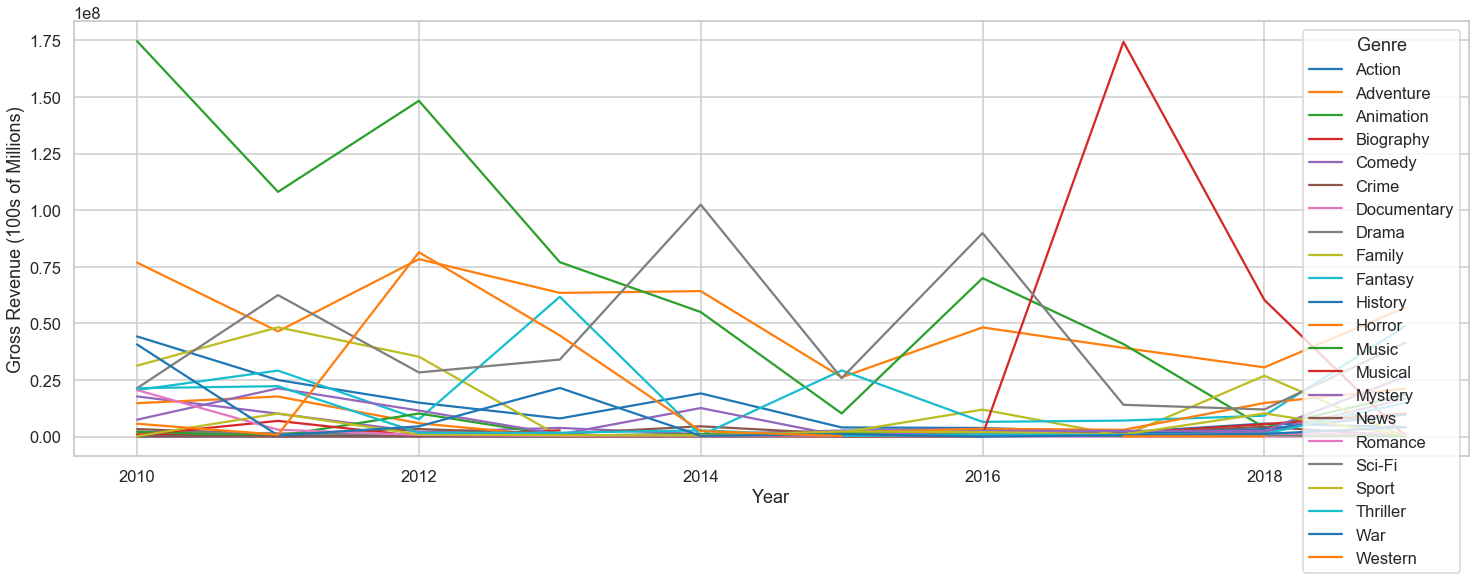

In [205]:
#Looking at the medians for all genres
all_median_gen_df = median_gen_df.unstack(level=0)
all_median_gen_df.columns = all_median_gen_df.columns.droplevel()
all_median_gen_df.plot(figsize=(25,8)).set(xlabel = "Year", ylabel = "Gross Revenue (100s of Millions)")

(array([2008., 2010., 2012., 2014., 2016., 2018., 2020.]),
 <a list of 7 Text xticklabel objects>)

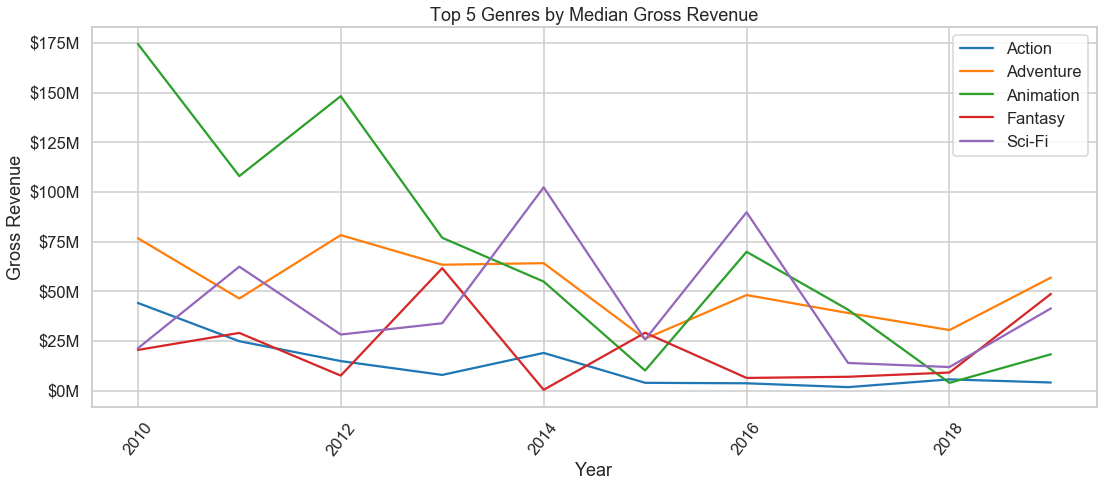

In [213]:
#Creating line chart with top 5 genres
median_5_gen_df = all_median_gen_df[["Action", "Adventure", "Animation", "Fantasy", "Sci-Fi"]]

#Set style, font size, figure size
fig, ax = plt.subplots(figsize=(18, 7))
    
    #Format y axis for millions of dollars
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '$' + '{:,.0f}'.format(x/1000000) + 'M'))
    
    #Create graph and format labels
g = sns.lineplot(data = median_5_gen_df,
                dashes = False,).set(xlabel = 'Year',
                ylabel = 'Gross Revenue', 
                title = 'Top 5 Genres by Median Gross Revenue')
plt.xticks(rotation=52)


In [196]:
#Creating dataframe with top 2 genres
limited_gens = gen_df[gen_df.Genre.isin(["Sci-Fi", "Adventure"])]

(array([2008., 2010., 2012., 2014., 2016., 2018., 2020.]),
 <a list of 7 Text xticklabel objects>)

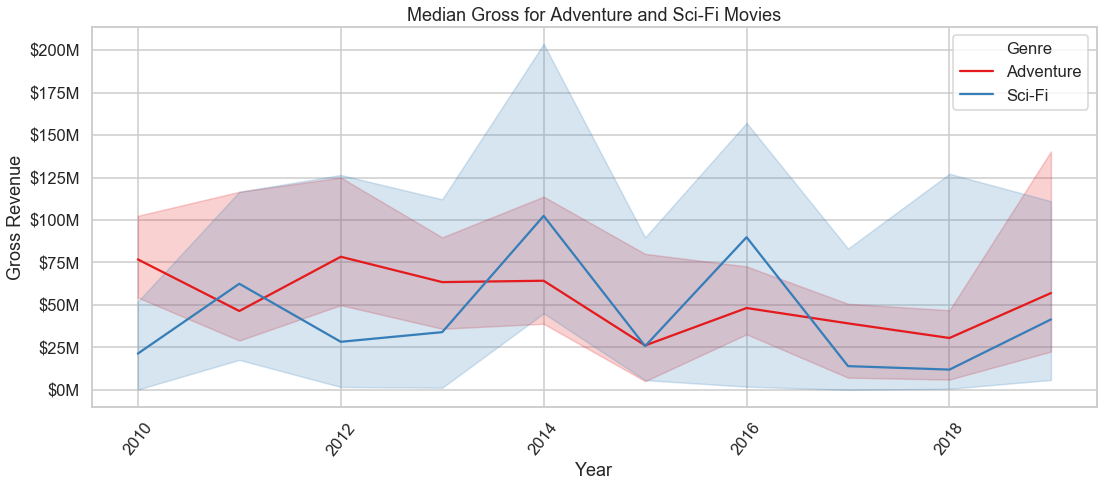

In [209]:
#Looking at top 2 genres including confidence intervals
fig, ax = plt.subplots(figsize=(18, 7))

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '$' + '{:,.0f}'.format(x/1000000) + 'M'))

g = sns.lineplot(data = limited_gens, hue="Genre", x="Year", y = "Lifetime_Gross", palette = "Set1", estimator=np.median).set(xlabel = 'Year',
                ylabel = 'Gross Revenue',
                title = 'Median Gross for Adventure and Sci-Fi Movies')

plt.xticks(rotation=52)
